<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Use natural language to visualize U.S. Markets from Japan**


## Overview


近年、日本の個人投資家は、非課税投資枠(NISA)の導入により、米国の金融市場や株式が注目しています。ところが、日本に住んでいる間、アメリカ経済を体感するのは難しい。日本に住んでいる間にアメリカ株の投資タイミングを判断する方法はないのでしょうか。

前回は米国市場の強気（牛：Bull）と弱気（熊：Bear）を可視化することができたら、投資判断に使えるのではないかというのが、着眼点でした。
牛と熊、そしてLLMの羊が登場したので、次は鳥：BlackSwanです。

シカゴの指数でSKEWと呼ばれるものがあります。これはオプションを使っているため、市場のリスク回避の指標と言われており、通称ブラックスワン、黒い白鳥と言われています。今回はこのシカゴの黒い白鳥を可視化することができないか、というのがお題です。


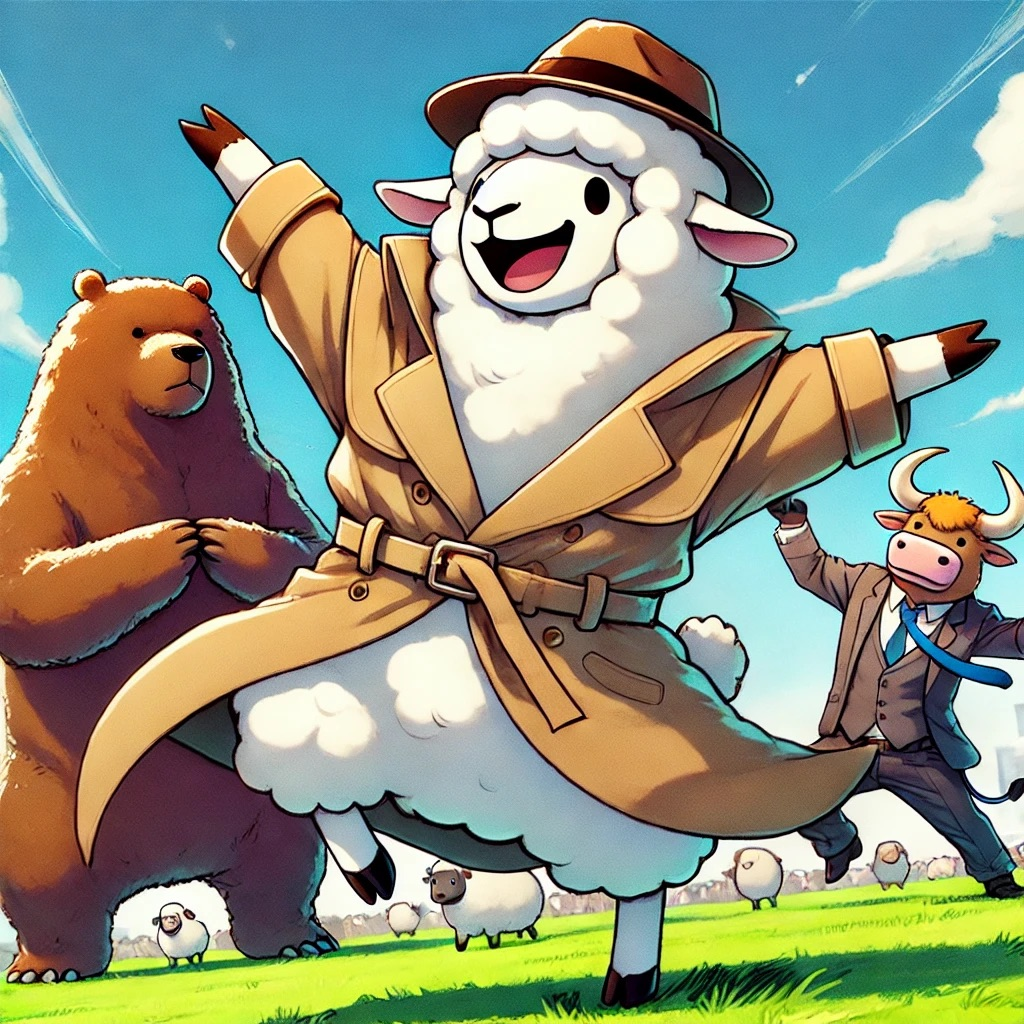

In [1]:
# Watson Llama もいいんですが、ChatGPTも面白いですね。
from IPython.display import Image
Image(filename='BullBear.jpeg')

----


## ChatGPT Visualization


### Installing required libraries

OllamaのLlama3.2のデータ可視化がイマイチだったので、ChatGPTで試してみたらとても良い感じでした。
ただ、トークンの使用料制限があるので、大きなデータを可視化しようとすると制限に引っかかってしまうし、もったいないです。
そこで、Chat GPTはダッシュボードの設計段階で使うことにしました。
ChatGPTから得られた可視化コードをローカルPC上のジュピターに移植する。以後のダッシュボードの更新はジュピター上で行うことで、トークンの使用量を節約しましょう、ということです。


In [3]:
!pip install matplotlib
!pip install seaborn
!pip install pyplot


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


In [5]:
import os
import pandas as pd


## Data set


普段はYahoo!ファイナンスのCSVダウンロードを使用していました。ところが最近、CSVダウンロード機能が、フリーからゴールド会員に料金変更されてしまいました。

これは大変残念なので、代替としてGoogle Sheetのグーグルファイナンス関数を使います。こちらはシートなので、データを見ながら関数が使えますから、マーケットデータの準備には大変良いツールです。

牛Bullと熊Bearの可視化ができたので、今度は黒い白鳥：BlackSwanをやってみます。
予めGoogleシート上で、関数　=@googlefinance("SKEW","Date","Price","[Start Date]","[Close Date]","Daily")

SKEWは国債と違ってボラティリティがあります。前日比で2.5％より低く上昇している場合はややBlackswan（２）、それより上昇している時はとてもBlackswan（３）、マイナス2.5％は逆を示します（１）。それよりもマイナスは逆を示します（０）。逆相関ですので、（3）ほど、市場が警戒している指標になるんじゃないか。そんな風に考えてシート上で簡単な階層分けをしています。


これをCSVにダウンロードして、次のプログラムで読み取っています。

In [25]:
#あらかじめgoogle sheet 上でGoogleファイナンス関数を使ってデータ準備をする。今回のティッカーはSKEWです。市場のリスク回避度を示す指数だと言われています。

data = pd.read_csv("SKEW.csv")


In [27]:
data.tail(20)


,Date,Open,High,Low,Close,Volume,DateGroup,Rate_To_PreviousDay,Bull_Bear
1733,2024/10/28 15:16:00,148.46,148.46,148.46,148.46,0,202410,-0.003022,1
1734,2024/10/29 15:16:00,150.74,150.74,150.74,150.74,0,202410,0.015358,2
1735,2024/10/30 15:16:00,153.45,153.45,153.45,153.45,0,202410,0.017978,2
1736,2024/10/31 15:16:00,152.07,152.07,152.07,152.07,0,202410,-0.008993,1
1737,2024/11/01 15:16:00,146.66,146.66,146.66,146.66,0,202411,-0.035576,0
1738,2024/11/04 15:16:00,148.95,148.95,148.95,148.95,0,202411,0.015614,2
1739,2024/11/05 15:16:00,152.68,152.68,152.68,152.68,0,202411,0.025042,3
1740,2024/11/06 15:16:00,148.11,148.11,148.11,148.11,0,202411,-0.029932,0
1741,2024/11/07 15:16:00,152.12,152.12,152.12,152.12,0,202411,0.027074,3
1742,2024/11/08 15:16:00,150.34,150.34,150.34,150.34,0,202411,-0.011701,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1753 non-null   object 
 1   Open                 1753 non-null   float64
 2   High                 1753 non-null   float64
 3   Low                  1753 non-null   float64
 4   Close                1753 non-null   float64
 5   Volume               1753 non-null   int64  
 6   DateGroup            1753 non-null   int64  
 7   Rate_To_PreviousDay  1753 non-null   float64
 8   Bull_Bear            1753 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 123.4+ KB


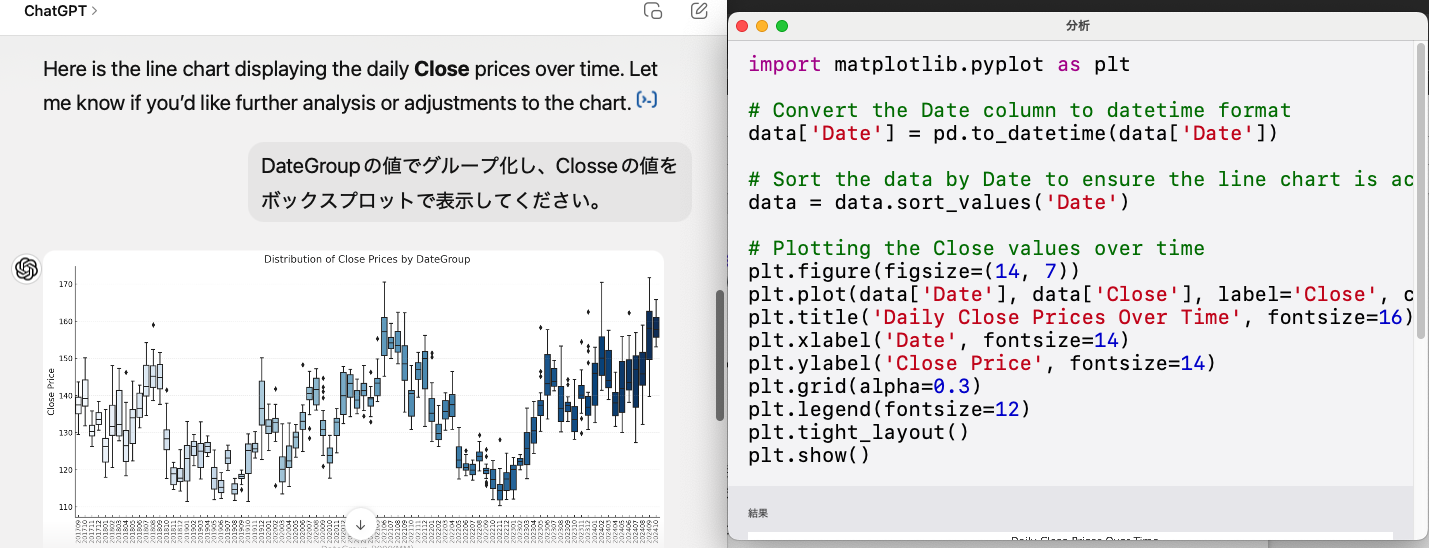

In [31]:
# ChatGPTのデータ可視化性能。ちなみの送ったプロンプトにミスタイプがありますが、意図を汲み取ってくれました。
from IPython.display import Image
Image(filename='ChatGPT_Visualization.png')


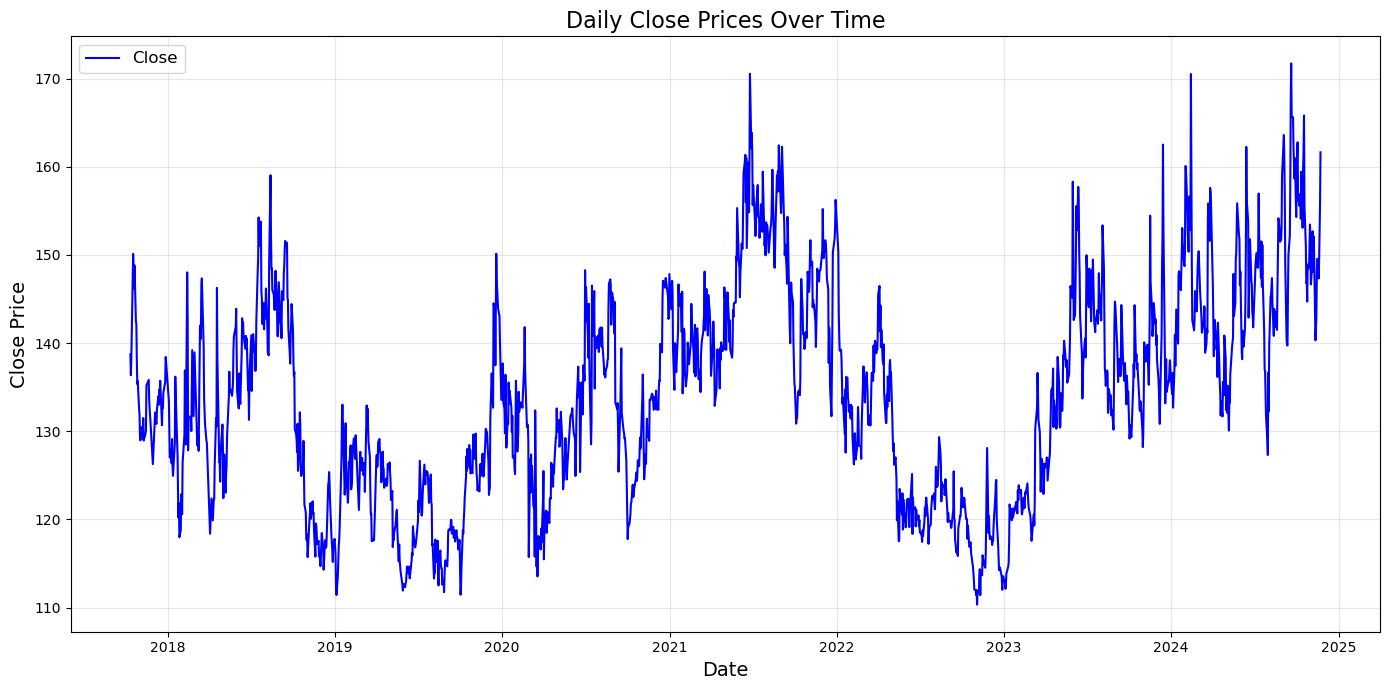

In [33]:
# 気に入ったダッシュボードのPythonコードを貼り付ける。
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date to ensure the line chart is accurate
data = data.sort_values('Date')

# Plotting the Close values over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close', color='blue', linewidth=1.5)
plt.title('Daily Close Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/ds/6kjlxy3155n7x7prhd6l8bym0000gn/T/ipykernel_4027/569228829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DateGroup', y='Close', data=data, palette='Blues')


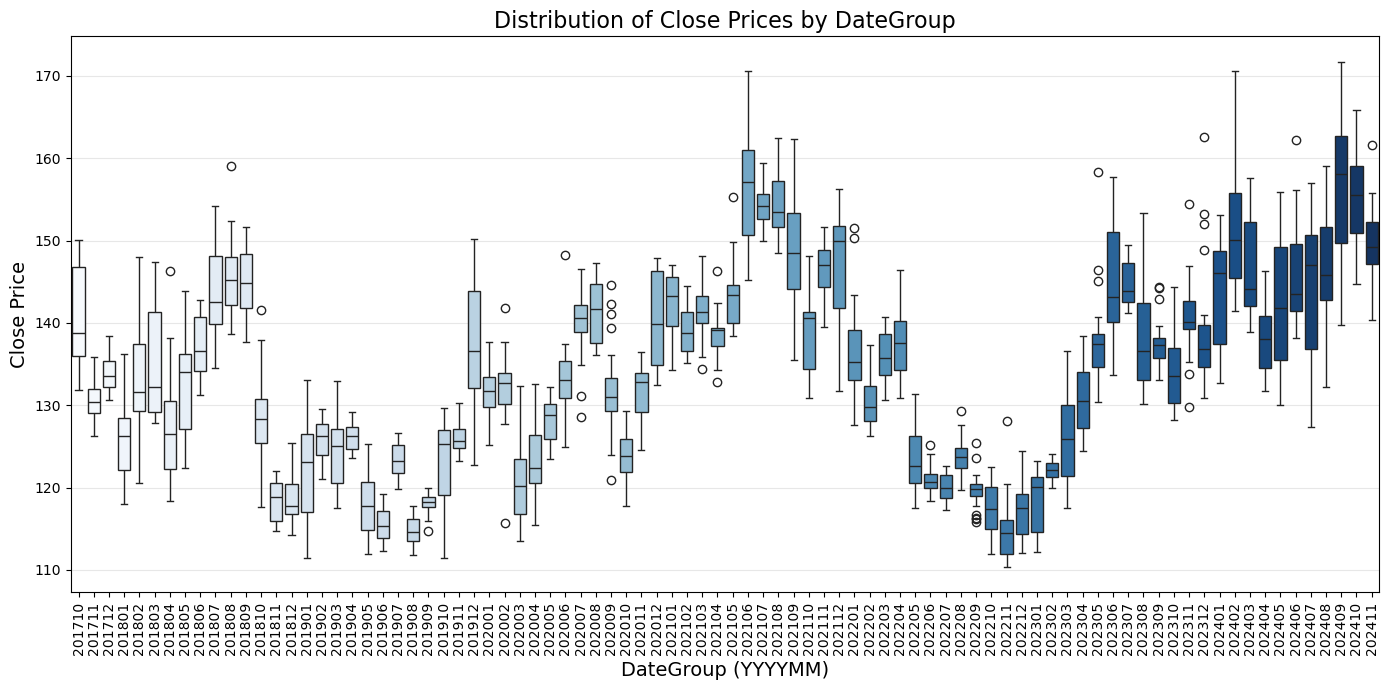

In [35]:
#ダッシュボードをインポートする。
import seaborn as sns

# Create a boxplot for Close values grouped by DateGroup
plt.figure(figsize=(14, 7))
sns.boxplot(x='DateGroup', y='Close', data=data, palette='Blues')

# Enhance plot aesthetics
plt.title('Distribution of Close Prices by DateGroup', fontsize=16)
plt.xlabel('DateGroup (YYYYMM)', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


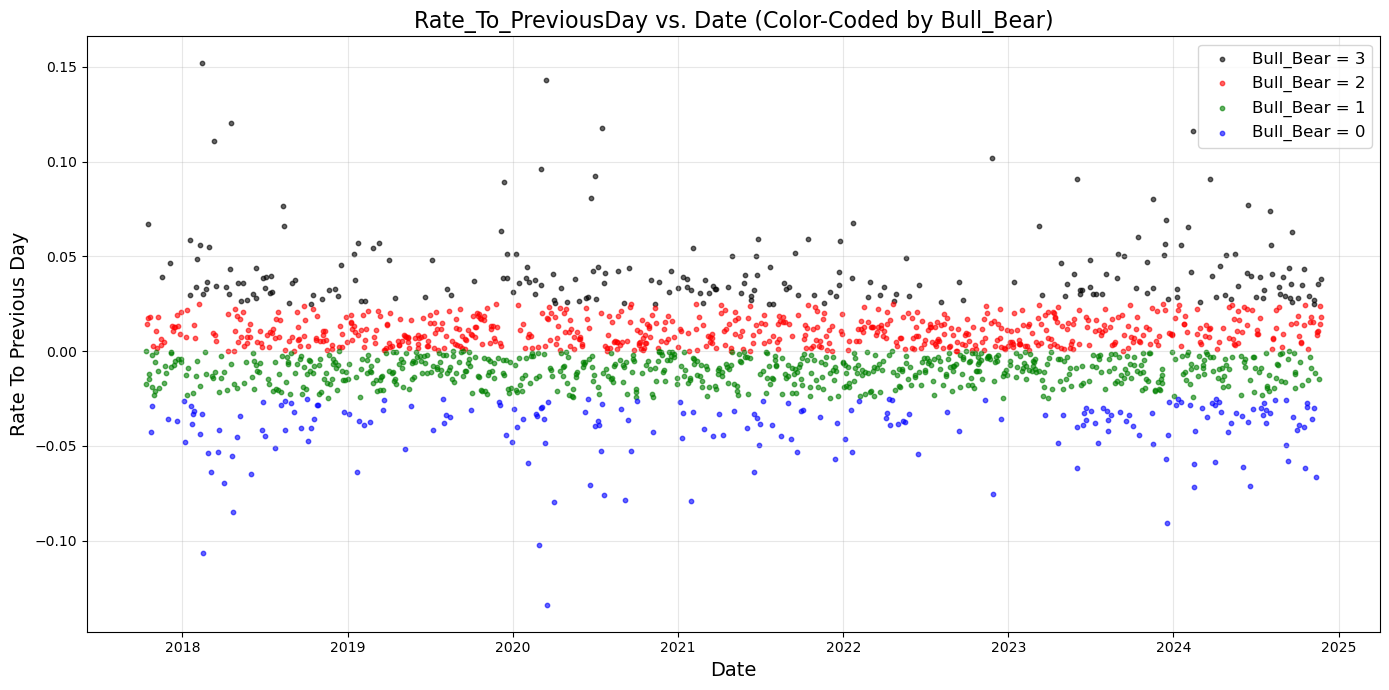

In [37]:
# Prepare a scatter plot for Rate_To_PreviousDay vs. Date with Bull_Bear color-coded

# Define a color map for Bull_Bear values
color_map = {3: 'black', 2: 'red', 1: 'green', 0: 'blue'}
data['Color'] = data['Bull_Bear'].map(color_map)

# Convert Date column to datetime format if not already converted
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the scatter plot
plt.figure(figsize=(14, 7))
for bull_bear, color in color_map.items():
    subset = data[data['Bull_Bear'] == bull_bear]
    plt.scatter(subset['Date'], subset['Rate_To_PreviousDay'], 
                color=color, label=f'Bull_Bear = {bull_bear}', alpha=0.6, s=10)

# Enhance plot aesthetics
plt.title('Rate_To_PreviousDay vs. Date (Color-Coded by Bull_Bear)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rate To Previous Day', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

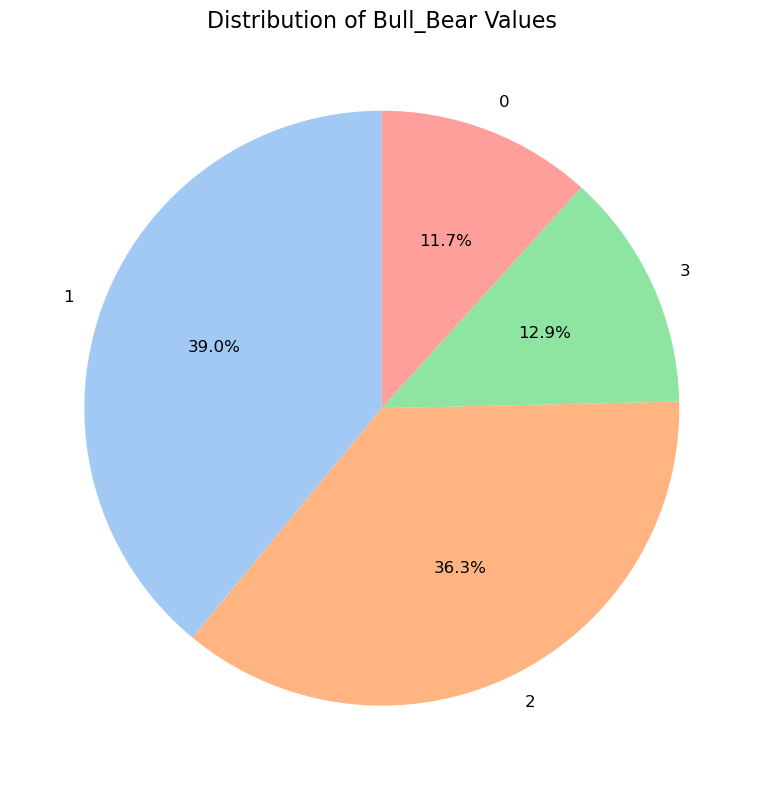

In [39]:
# Count the occurrences of each value in the Bull_Bear column
bull_bear_counts = data['Bull_Bear'].value_counts()

# Plot a pie chart for Bull_Bear value counts
plt.figure(figsize=(8, 8))
bull_bear_counts.plot.pie(
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    startangle=90, 
    labels=bull_bear_counts.index, 
    textprops={'fontsize': 12}
)

# Enhance plot aesthetics
plt.title('Distribution of Bull_Bear Values', fontsize=16)
plt.ylabel('')  # Hide the y-axis label for a cleaner look
plt.tight_layout()
plt.show()

## Author


Yuya MORI